In [1]:
epochs = 50
# Image found at https://horseandrider.com/.image/t_share/MTYwNzAwMDU0MjMzOTQ5MjM5/robinfridconformationclinic-6.jpg
# and https://horseandrider.com/horse-health-care/take-conformation-clinic-photo
img_dir_gdrive = "/content/drive/MyDrive/ML_IoT/horse.jpg"
img_dir_local = "./horse.jpg"
activation_func = "relu"

## General functions and helper functions

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# example of loading an image with the Keras API
from keras_preprocessing import image

# Helper libraries
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)

def quick_bar(x):
    return plt.bar(np.arange(len(x)), x)

def grouped_bar(l_values, l_group_names=None): # list of arrays, one for each group
    if l_group_names is None:
        l_group_names = ['']*len(l_values)
    
    frac = 0.8 # each field N has space from N-0.5 to N+0.5 to use. we'll use frac of it
    ind = np.arange(len(l_values[0]))  # the x locations for the groups
    
    width = frac/len(l_values)  # the width of the bars

    fig = plt.gcf()
    ax = plt.gca()
    rects = []
    for i, group_data in enumerate(l_values):
        # the spacing code needs some work.  
        bar_centers = ind-0.5*frac + width/2 + i*width
        rects.append(ax.bar(bar_centers, group_data, width, label=l_group_names[i]))

    ax.set_xticks(ind)
    # ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
    ax.legend()
    

def plotyy(xdata, y1, y2, color1='tab:red', color2='tab:blue', ylabel1='', ylabel2='', xlabel=''):
    ## adapated from https://matplotlib.org/2.2.5/gallery/api/two_scales.html
    fig = plt.gcf()
    ax1 = plt.gca()
    
    ax1.plot(xdata, y1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)    
    ax1.set_ylabel(ylabel1, color=color1) 
    ax1.set_xlabel(xlabel)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis        
    ax2.set_ylabel(ylabel2, color=color2)  # we already handled the x-label with ax1
    ax2.plot(xdata, y2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    return (ax1, ax2)



2.4.1


## This is for Google Colab use only

Mounted at /content/drive


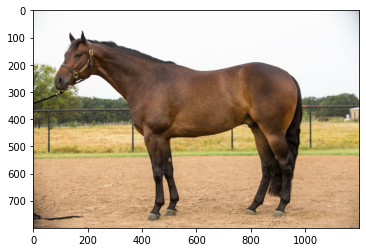

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    img_dir = img_dir_gdrive
except:
    img_dir = img_dir_local
    
import PIL
import PIL.Image

image_full_rez = PIL.Image.open(img_dir)
plt.figure()
plt.imshow(image_full_rez)

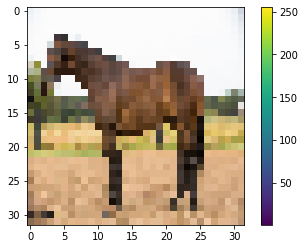

In [4]:
images = image.load_img(img_dir, target_size=(32, 32))

plt.figure()
plt.imshow(images)
plt.colorbar()

## Import CIFAR10 data

In [5]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
input_shape = train_images.shape[1:]
print(input_shape)

170500096/170498071 [==============================] - 2s 0us/step
(32, 32, 3)


Text(0.5, 1.0, 'Label = deer')

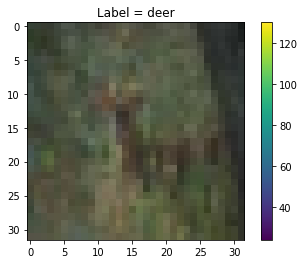

In [6]:
idx = 10
plt.figure()
plt.imshow(train_images[idx])
plt.colorbar()
plt.title("Label = {:}".format(class_names[train_labels[idx][0]]))

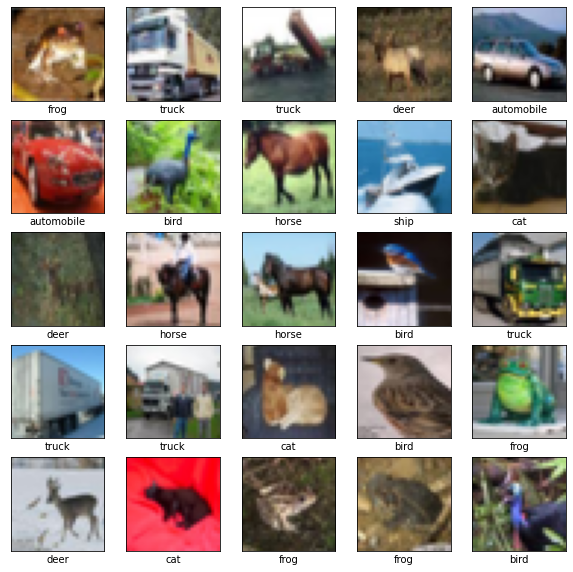

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Feb. 18 Lecture Example

In [8]:
model_feb18 = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(64, kernel_size=(3,3), activation=activation_func, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3,3), activation=activation_func, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),    
    layers.Conv2D(256, kernel_size=(3,3), activation=activation_func, padding='same'),
    layers.Conv2D(256, kernel_size=(3,3), activation=activation_func, padding='same'),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation=activation_func),
    layers.Dense(256, activation=activation_func),
    layers.Dense(10)
])
model_feb18.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_feb18.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [9]:
train_hist = model_feb18.fit(train_images, train_labels, epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 16s 6ms/step - loss: 2.2124 - accuracy: 0.3427
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1795 - accuracy: 0.5889
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9854 - accuracy: 0.6567
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8553 - accuracy: 0.7030
Epoch 5/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7485 - accuracy: 0.7387
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6692 - accuracy: 0.7700
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5803 - accuracy: 0.7991
Epoch 8/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5012 - accuracy: 0.8288
Epoch 9/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4399 - accuracy: 0.8507
Epoch 10/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.39

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a102c5490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a10151250>)

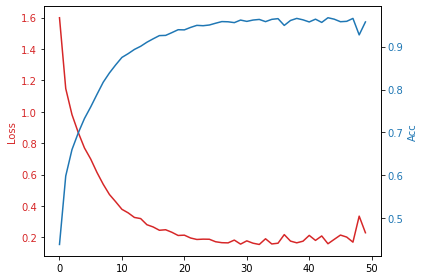

In [10]:
train_hist.history
plotyy(np.arange(epochs), train_hist.history['loss'], train_hist.history['accuracy'],
      ylabel1='Loss', ylabel2='Acc')

In [11]:
test_loss, test_acc = model_feb18.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.4424 - accuracy: 0.6719


I think that this image is an frog.


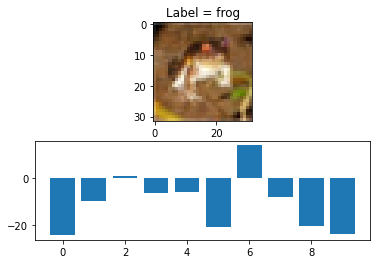

In [12]:
idx = 0
ex_img = train_images[idx:idx+1]
ex_out = model_feb18.predict(ex_img)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.title("Label = {:}".format(class_names[train_labels[idx][0]]))

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
class_name = np.argmax(ex_out[0])

print("I think that this image is an " + class_names[class_name] + ".")

### Personal Image

I think that this image is an horse.


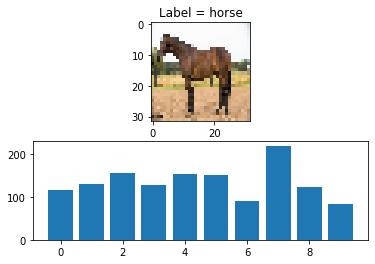

In [13]:
x = np.array([ image.img_to_array(images, dtype=np.uint8) ])
# x = np.array([ train_images[7] ])

ex_out = model_feb18.predict(x)
plt.subplot(2,1,1)
plt.imshow(x[0])
plt.title("Label = {:}".format(class_names[train_labels[7][0]]))

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
class_name = np.argmax(ex_out[0])

print("I think that this image is an " + class_names[class_name] + ".")

## Part 2

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        activation=activation_func,
        input_shape=input_shape
    ),
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        activation=activation_func
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=activation_func),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 1,079,242
Trainable params: 1,079,242
Non-trainable params: 0
____________________________________________

In [16]:
train_hist = model.fit(train_images, train_labels, epochs=epochs)
model.save('./saved_models/cifar_cnn_model')

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 3.8341 - accuracy: 0.3333
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2873 - accuracy: 0.5422
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0984 - accuracy: 0.6130
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9280 - accuracy: 0.6768
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7768 - accuracy: 0.7273
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6319 - accuracy: 0.7808
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5116 - accuracy: 0.8256
Epoch 8/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4014 - accuracy: 0.8668
Epoch 9/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3425 - accuracy: 0.8866
Epoch 10/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.300

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a68d704d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a102b0590>)

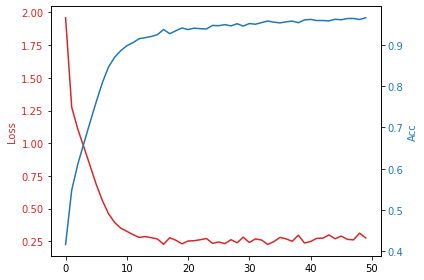

In [17]:
train_hist.history
plotyy(np.arange(epochs), train_hist.history['loss'], train_hist.history['accuracy'],
      ylabel1='Loss', ylabel2='Acc')

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 13.9423 - accuracy: 0.5716


I think that this image is an frog.


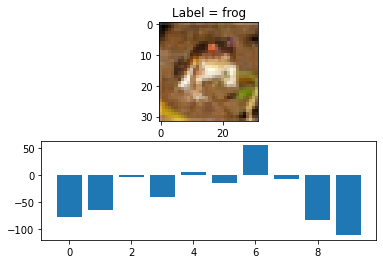

In [19]:
idx = 0
ex_img = train_images[idx:idx+1]
ex_out = model.predict(ex_img)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')
plt.title("Label = {:}".format(class_names[train_labels[idx][0]]))

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
class_name = np.argmax(ex_out[0])

print("I think that this image is an " + class_names[class_name] + ".")

### Personal Image

I think that this image is an horse.


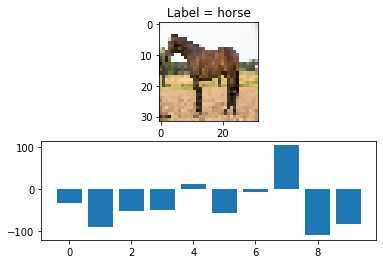

In [20]:
x = np.array([ image.img_to_array(images, dtype=np.uint8) ])
# x = np.array([ train_images[7] ])

ex_out = model.predict(x)
plt.subplot(2,1,1)
plt.imshow(x[0])
plt.title("Label = {:}".format(class_names[train_labels[7][0]]))

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
class_name = np.argmax(ex_out[0])

print("I think that this image is an " + class_names[class_name] + ".")

## Part 8

In [21]:
model2 = tf.keras.Sequential([
    tf.keras.layers.DepthwiseConv2D(
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        activation=activation_func,
        input_shape=input_shape
    ),
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(1, 1),
        activation=activation_func,
    ),
    tf.keras.layers.DepthwiseConv2D(
        kernel_size=(3, 3),
        strides=(2, 2),
        padding="same",
        activation=activation_func,
    ),
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(1, 1),
        activation=activation_func,
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=(2, 2)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=activation_func),
    tf.keras.layers.Dense(10)
])
model2.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d (DepthwiseC (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)             

In [22]:
train_hist2 = model2.fit(train_images, train_labels, epochs=epochs)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8359 - accuracy: 0.3837
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2233 - accuracy: 0.5655
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0432 - accuracy: 0.6302
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8817 - accuracy: 0.6876
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7102 - accuracy: 0.7502
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5390 - accuracy: 0.8129
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3766 - accuracy: 0.8726
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2616 - accuracy: 0.9096
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1880 - accuracy: 0.9362
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.152

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a0868fe50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a68f4f510>)

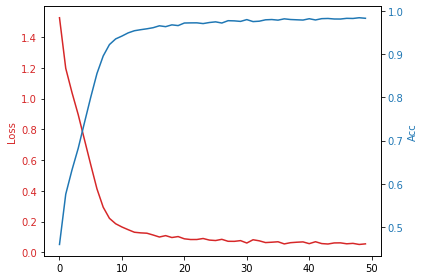

In [23]:
train_hist2.history
plotyy(np.arange(epochs), train_hist2.history['loss'], train_hist2.history['accuracy'],
      ylabel1='Loss', ylabel2='Acc')

In [24]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 4.9908 - accuracy: 0.5767


### Personal image

I think that this image is an horse.


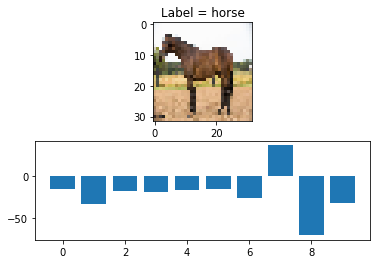

In [25]:
x = np.array([ image.img_to_array(images, dtype=np.uint8) ])
# x = np.array([ train_images[7] ])

ex_out = model2.predict(x)
plt.subplot(2,1,1)
plt.imshow(x[0])
plt.title("Label = {:}".format(class_names[train_labels[7][0]]))

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])
class_name = np.argmax(ex_out[0])

print("I think that this image is an " + class_names[class_name] + ".")